In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
user = pd.read_csv('./fresh_comp_offline/tianchi_fresh_comp_train_user.csv')

In [3]:
user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,10001082,285259775,1,97lk14c,4076,2014-12-08 18
1,10001082,4368907,1,NaN,5503,2014-12-12 12
2,10001082,4368907,1,NaN,5503,2014-12-12 12
3,10001082,53616768,1,NaN,9762,2014-12-02 15
4,10001082,151466952,1,NaN,5232,2014-12-12 11


#### 计算CVR

behavior_type: 用户对商品的行为类型 包括浏览、收藏、加购物车、购买，对应取值分别是1、2、3、4

In [4]:
count_user = user['behavior_type'].value_counts()

In [5]:
count_all = count_user[1] + count_user[2] + count_user[3] + count_user[4]

In [6]:
count_4 = count_user[4]

In [7]:
cvr = count_4/count_all

In [8]:
print('CVR: {:.4f}%'.format(cvr*100))                  # 购买占所有用户行为中的比例

CVR: 0.9986%


#### Time

In [9]:
# 将time字段设置为pandas中的datetime类型
user['time'] = pd.to_datetime(user['time'])

In [10]:
user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,10001082,285259775,1,97lk14c,4076,2014-12-08 18:00:00
1,10001082,4368907,1,NaN,5503,2014-12-12 12:00:00
2,10001082,4368907,1,NaN,5503,2014-12-12 12:00:00
3,10001082,53616768,1,NaN,9762,2014-12-02 15:00:00
4,10001082,151466952,1,NaN,5232,2014-12-12 11:00:00


将时间作为index

In [11]:
user.index = user['time']

In [12]:
user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
time,,,,,,
2014-12-08 18:00:00,10001082,285259775,1,97lk14c,4076,2014-12-08 18:00:00
2014-12-12 12:00:00,10001082,4368907,1,NaN,5503,2014-12-12 12:00:00
2014-12-12 12:00:00,10001082,4368907,1,NaN,5503,2014-12-12 12:00:00
2014-12-02 15:00:00,10001082,53616768,1,NaN,9762,2014-12-02 15:00:00
2014-12-12 11:00:00,10001082,151466952,1,NaN,5232,2014-12-12 11:00:00


In [13]:
user.index[0]                 #查看第一个index

Timestamp('2014-12-08 18:00:00')

In [14]:
# 可以用.loc['2014']查看这一年的情况，.loc['2014-12']查看14年12月的情况， .loc['2014-12-08']查看14年12月8号这一天的情况
user.loc['2014-12-08']       

,user_id,item_id,behavior_type,user_geohash,item_category,time
time,,,,,,
2014-12-08 18:00:00,10001082,285259775,1,97lk14c,4076,2014-12-08 18:00:00
2014-12-08 07:00:00,10001082,275221686,1,NaN,10576,2014-12-08 07:00:00
2014-12-08 07:00:00,10001082,236453039,1,NaN,10576,2014-12-08 07:00:00
2014-12-08 07:00:00,10001082,275221686,1,NaN,10576,2014-12-08 07:00:00
2014-12-08 00:00:00,10001082,275221686,1,NaN,10576,2014-12-08 00:00:00
...,...,...,...,...,...,...
2014-12-08 12:00:00,65341491,128927836,1,95qhb05,12510,2014-12-08 12:00:00
2014-12-08 19:00:00,65341491,242501625,1,95qhbs7,3942,2014-12-08 19:00:00
2014-12-08 19:00:00,65341491,133486908,1,95qhb09,3942,2014-12-08 19:00:00


统计时间

In [15]:
from collections import defaultdict
from datetime import datetime, timedelta

In [16]:
# 从2014-11-18遍历到2014-12-18
str1 = '2014-11-17'
temp_date = datetime.strptime(str1, '%Y-%m-%d')
delta = timedelta(days=1)

In [17]:
count_day = defaultdict(int)                                     # 按天记录所有行为的次数

for i in range(31):
    temp_date = temp_date + delta
    # 将时间转换成字符串类型
    temp_str = temp_date.strftime('%Y-%m-%d')
    count_day[temp_str] = user.loc[temp_str].shape[0]            # 获取该天的行为次数

In [18]:
type(temp_date), type(temp_str)

(datetime.datetime, str)

In [19]:
count_day

defaultdict(int,
            {'2014-11-18': 684628,
             '2014-11-19': 687528,
             '2014-11-20': 672189,
             '2014-11-21': 634122,
             '2014-11-22': 668509,
             '2014-11-23': 722978,
             '2014-11-24': 718217,
             '2014-11-25': 699413,
             '2014-11-26': 679323,
             '2014-11-27': 689855,
             '2014-11-28': 658806,
             '2014-11-29': 684442,
             '2014-11-30': 751093,
             '2014-12-01': 744363,
             '2014-12-02': 753810,
             '2014-12-03': 788689,
             '2014-12-04': 745391,
             '2014-12-05': 693593,
             '2014-12-06': 732821,
             '2014-12-07': 763498,
             '2014-12-08': 753138,
             '2014-12-09': 767838,
             '2014-12-10': 788712,
             '2014-12-11': 944979,
             '2014-12-12': 1344980,
             '2014-12-13': 777013,
             '2014-12-14': 779285,
             '2014-12-15': 764085,
  

In [20]:
# 将上述count_day放入DataFrame中，准备绘制 
df_count_day = pd.DataFrame.from_dict(count_day, orient='index', columns=['count'])

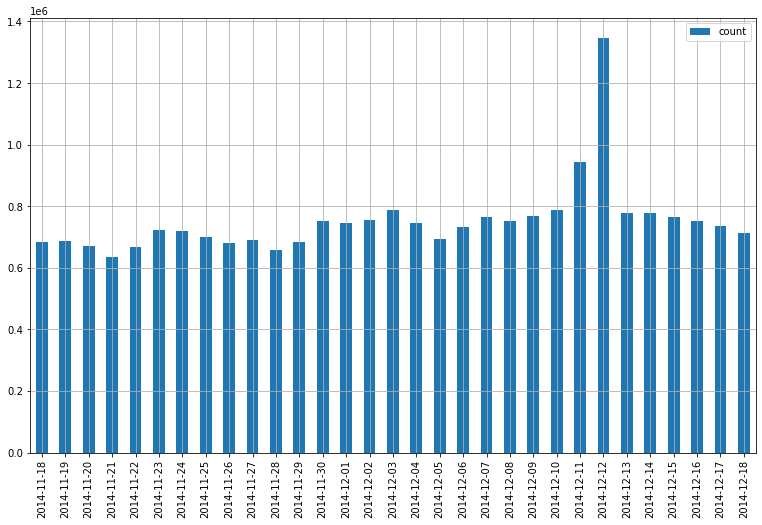

In [21]:
plt.rcParams['figure.figsize'] = (13.0, 8.0) 
df_count_day['count'].plot(kind='bar')
plt.legend(loc='best')
plt.grid(True)
plt.show()

##### 可以看到双十二这一天的操作次数最频繁，而12-11次之

统计商品子集P关于日期的操作次数

In [22]:
# 属于商品子集P的操作次数
item = pd.read_csv('./fresh_comp_offline/tianchi_fresh_comp_train_item.csv')

In [23]:
item.head()

,item_id,item_geohash,item_category
0,100002303,NaN,3368
1,100003592,NaN,7995
2,100006838,NaN,12630
3,100008089,NaN,7791
4,100012750,NaN,9614


In [24]:
# 共422858个item_id
item.item_id.value_counts()

25013404     8724
311093202    5999
228198932    5597
238357777    5522
313822206    4517
             ... 
356030024       1
348159835       1
38815580        1
314595166       1
154142721       1
Name: item_id, Length: 422858, dtype: int64

In [25]:
item.item_geohash.value_counts()

956mo92    116
95q5lu5    111
955l2je    108
95riauf    107
956mk3j    107
          ... 
94l4ddc      1
9q0ff0c      1
9rf95gl      1
9r5f7us      1
955sfjf      1
Name: item_geohash, Length: 57358, dtype: int64

In [26]:
# 将商品子集DataFrame和原始带有时间的user DataFrame合并(交集)--> 'inner'
p_item = user.merge(item, how='inner', on='item_id').set_index('time', drop=True)

In [27]:
count_p = defaultdict(int)

str1 = '2014-11-17'
temp_date = datetime.strptime(str1, '%Y-%m-%d')
delta = timedelta(days=1)

In [28]:
for i in range(31):
    temp_date += delta
    temp_str = temp_date.strftime('%Y-%m-%d')
    count_p[temp_str] = p_item.loc[temp_str].shape[0]  

In [29]:
count_p

defaultdict(int,
            {'2014-11-18': 86732,
             '2014-11-19': 94513,
             '2014-11-20': 90008,
             '2014-11-21': 81061,
             '2014-11-22': 121133,
             '2014-11-23': 157253,
             '2014-11-24': 113969,
             '2014-11-25': 106101,
             '2014-11-26': 103857,
             '2014-11-27': 91260,
             '2014-11-28': 135652,
             '2014-11-29': 127997,
             '2014-11-30': 117067,
             '2014-12-01': 104922,
             '2014-12-02': 134609,
             '2014-12-03': 144284,
             '2014-12-04': 103145,
             '2014-12-05': 114820,
             '2014-12-06': 138450,
             '2014-12-07': 129833,
             '2014-12-08': 157222,
             '2014-12-09': 204471,
             '2014-12-10': 149494,
             '2014-12-11': 225812,
             '2014-12-12': 422308,
             '2014-12-13': 120220,
             '2014-12-14': 130784,
             '2014-12-15': 156657,
        

In [30]:
p_dict = pd.DataFrame.from_dict(count_p, orient='index', columns=['count'])

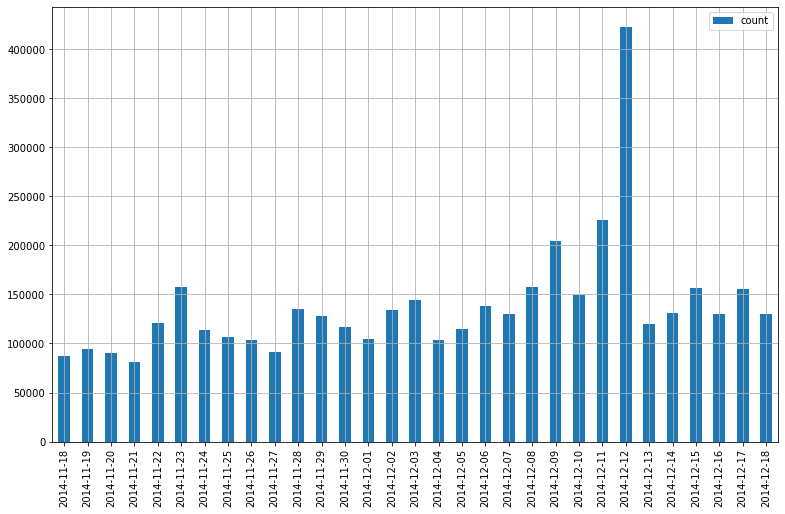

In [31]:
plt.rcParams['figure.figsize'] = (13.0, 8.0) 
p_dict['count'].plot(kind='bar')
plt.legend()
plt.grid(True)
plt.show()

以上做的是日期为单位的探索，得知了双十二这一天的用户行为较多，因此，下面做基于小时的探索，探索每个小时，这四种行为的分布情况

In [32]:
date='2014-12-12'
count_hour = {}
for i in range(24):
    time_str = date + ' %02.d' % i                                        # 得到小时，注意' %02.d'百分号前有空格
    count_hour[time_str] = [0,0,0,0]
    temp = p_item.loc[time_str]['behavior_type'].value_counts()           # 得到每种行为的计数
    for j in range(len(temp)):
        count_hour[time_str][temp.index[j]-1] += temp[temp.index[j]]      # 在每个小时下记录每种行为
print(count_hour)

{'2014-12-12 00': [29817, 336, 285, 758], '2014-12-12 01': [8736, 101, 288, 75], '2014-12-12 02': [13356, 24, 196, 22], '2014-12-12 03': [4530, 14, 42, 27], '2014-12-12 04': [4280, 11, 42, 10], '2014-12-12 05': [1243, 4, 46, 27], '2014-12-12 06': [6992, 20, 388, 60], '2014-12-12 07': [12673, 24, 102, 80], '2014-12-12 08': [19034, 40, 462, 558], '2014-12-12 09': [13913, 39, 176, 130], '2014-12-12 10': [43971, 55, 522, 210], '2014-12-12 11': [29353, 1662, 468, 140], '2014-12-12 12': [32532, 60, 211, 144], '2014-12-12 13': [9523, 65, 1811, 1745], '2014-12-12 14': [23214, 74, 182, 134], '2014-12-12 15': [9205, 51, 204, 122], '2014-12-12 16': [8948, 50, 145, 83], '2014-12-12 17': [20686, 225, 274, 165], '2014-12-12 18': [8288, 75, 109, 79], '2014-12-12 19': [19089, 48, 171, 118], '2014-12-12 20': [16837, 93, 198, 119], '2014-12-12 21': [20207, 85, 325, 176], '2014-12-12 22': [22404, 109, 373, 189], '2014-12-12 23': [25051, 1745, 1028, 197]}


In [33]:
hour_df = pd.DataFrame.from_dict(count_hour, orient='index')

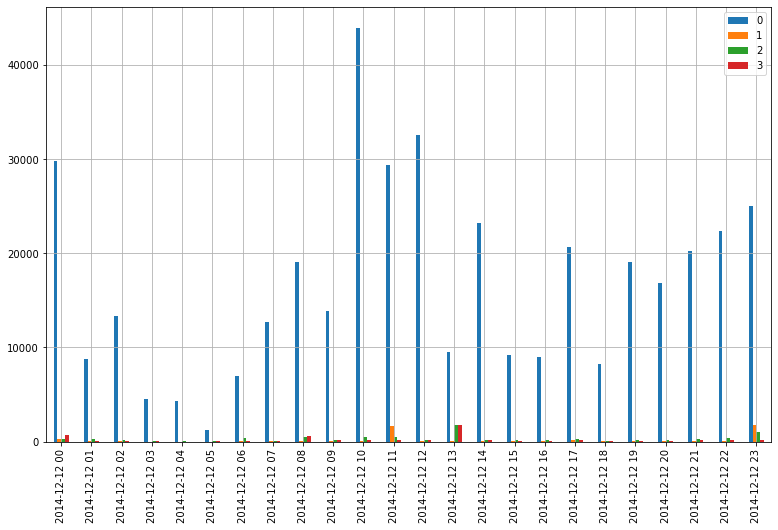

In [34]:
plt.rcParams['figure.figsize'] = (13.0, 8.0) 
hour_df.plot(kind='bar')
plt.legend(loc='best')                 # 0:浏览、1:收藏、2:加购物车、3:购买
plt.grid(True)
plt.show()